In [1]:
import pandas as pb

In [2]:
import numpy as np

In [3]:
import re

In [4]:
resp= pb.read_csv('responses.csv')

In [5]:
resp

,Timestamp,Name,Year of Study,Course,Branch,How many people do you usually dine with?,"Which meal do you most frequently purchase from food outlets, either on or off-campus?",What time do you usually eat the selected meal?,How hungry are you before deciding where to eat?,Do you usually prefer to have drinks with your meal?,What is your average budget per person for a meal (enter numerical value only)?,How far are you willing to travel for food? (in minutes walking/biking/driving) (enter numerical value only),What type of food do you usually prefer while eating out?,Where do you usually go to eat based on your selections above? (on campus),off campus,How often do you visit these places in a week?,What factors influence your choice the most? (Select up to 3),Do you have any dietary restrictions or preferences?
0,4/4/2025 19:18:29,Muskan,1,MTech,Computer Science,2-3 people,Evening Refreshments,17,Somewhat hungry,No,80,5,Veg,Nescafe,bowzi,Rarely (1-2 times),Food Quality,No
1,4/4/2025 22:38:53,Rahul Sharma,4,BTech,MCE,More than 6,Dinner,22,Very hungry,Yes,200,10,Non Veg,Canteen,crazy crisp,Rarely (1-2 times),"Price, Distance, Food Quality, Speed of Service",Lactose intolerance
2,4/4/2025 22:46:26,Ayush,3,BTech,Software Engineering,2-3 people,Dinner,22,Somewhat hungry,No,140,7,Doesn't affect my choice of outlet,Hims,Zomato/Mehfil,Often (5+ times),"Food Quality, Variety",No
3,4/4/2025 22:52:55,Tanvi Rai,1,MSC,Management,Alone,Evening Refreshments,16,Very hungry,Yes,200,10,Veg,Raydee,bowzi,Sometimes (3-4 times),Price,Vegetarian food
4,4/4/2025 22:59:07,Komal,3,BTech,Software engineering,2-3 people,Dinner,20,Somewhat hungry,No,100,0,Non Veg,Raj soin,dtu cafe,Sometimes (3-4 times),"Price, Food Quality, Friend's Preference",Nope
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,4/14/2025 19:09:30,Sarthak Katyal,3,BDes,Design,2-3 people,Lunch,14,Somewhat hungry,Yes,100,5,Doesn't affect my choice of outlet,Canteen,None. I prefer online food services.,Rarely (1-2 times),"Price, Distance, Food Quality, Variety, Friend...",No.
193,4/14/2025 20:47:42,Abhay kumar,1,BTech,Civil,Alone,Lunch,12,Somewhat hungry,Yes,60,7,Veg,Udupi,baozi,Sometimes (3-4 times),Price,No
194,4/16/2025 1:29:38,Pratham Bansal,3,BTech,Civil Engineering,2-3 people,Dinner,21,Somewhat hungry,Yes,700,30,Doesn't affect my choice of outlet,Nescafe,yellow bowl,Rarely (1-2 times),"Price, Food Quality, Ambience, Friend's Prefer...",Nothing as such!
195,4/16/2025 11:18:17,Preeti,2,MBA,DSM,Alone,Evening Refreshments,16,Very hungry,No,100,10,Veg,Raydee,Bunkar house,Sometimes (3-4 times),"Price, Food Quality, Speed of Service",No


In [6]:
resp.head()

,Timestamp,Name,Year of Study,Course,Branch,How many people do you usually dine with?,"Which meal do you most frequently purchase from food outlets, either on or off-campus?",What time do you usually eat the selected meal?,How hungry are you before deciding where to eat?,Do you usually prefer to have drinks with your meal?,What is your average budget per person for a meal (enter numerical value only)?,How far are you willing to travel for food? (in minutes walking/biking/driving) (enter numerical value only),What type of food do you usually prefer while eating out?,Where do you usually go to eat based on your selections above? (on campus),off campus,How often do you visit these places in a week?,What factors influence your choice the most? (Select up to 3),Do you have any dietary restrictions or preferences?
0,4/4/2025 19:18:29,Muskan,1,MTech,Computer Science,2-3 people,Evening Refreshments,17,Somewhat hungry,No,80,5,Veg,Nescafe,bowzi,Rarely (1-2 times),Food Quality,No
1,4/4/2025 22:38:53,Rahul Sharma,4,BTech,MCE,More than 6,Dinner,22,Very hungry,Yes,200,10,Non Veg,Canteen,crazy crisp,Rarely (1-2 times),"Price, Distance, Food Quality, Speed of Service",Lactose intolerance
2,4/4/2025 22:46:26,Ayush,3,BTech,Software Engineering,2-3 people,Dinner,22,Somewhat hungry,No,140,7,Doesn't affect my choice of outlet,Hims,Zomato/Mehfil,Often (5+ times),"Food Quality, Variety",No
3,4/4/2025 22:52:55,Tanvi Rai,1,MSC,Management,Alone,Evening Refreshments,16,Very hungry,Yes,200,10,Veg,Raydee,bowzi,Sometimes (3-4 times),Price,Vegetarian food
4,4/4/2025 22:59:07,Komal,3,BTech,Software engineering,2-3 people,Dinner,20,Somewhat hungry,No,100,0,Non Veg,Raj soin,dtu cafe,Sometimes (3-4 times),"Price, Food Quality, Friend's Preference",Nope


In [7]:
resp.shape

(197, 18)

In [8]:
resp.drop('Timestamp',axis=1,inplace=True)

In [9]:
# resp.drop('id',axis=1,inplace=True)

In [10]:
# resp.insert(0, 'id', range(len(resp)))
resp.insert(0, 'id', [f'ID{str(i).zfill(3)}' for i in range(1, len(resp) + 1)])


In [11]:
resp.rename(columns={'  Do you have any dietary restrictions or preferences?  ': 'dietary_restriction'}, inplace=True)
resp.rename(columns={'  What factors influence your choice the most? (Select up to 3)  ': 'factors'}, inplace=True)
resp.rename(columns={'What type of food do you usually prefer while eating out? ': 'preferred_food_type'}, inplace=True)
resp.rename(columns={'  What is your average budget per person for a meal (enter numerical value only)?': 'budget'}, inplace=True)
resp.rename(columns={'  Do you usually prefer to have drinks with your meal?  ': 'prefer_drinks'}, inplace=True)
resp.rename(columns={'  How hungry are you before deciding where to eat?  ': 'hunger_level'}, inplace=True)
resp.rename(columns={'off campus ': 'places'}, inplace=True)
resp.rename(columns={'  Where do you usually go to eat based on your selections above? (on campus)': 'on camp'}, inplace=True)
resp.rename(columns={'Which meal do you most frequently purchase from food outlets, either on or off-campus? ': 'frequent_meal_type'}, inplace=True)
resp.rename(columns={'  How far are you willing to travel for food? (in minutes walking/biking/driving) (enter numerical value only)': 'distance'}, inplace=True)

In [12]:
resp.columns.tolist()

['id',
 'Name ',
 'Year of Study',
 'Course ',
 'Branch ',
 '  How many people do you usually dine with?  ',
 'frequent_meal_type',
 'What time do you usually eat the selected meal?',
 'hunger_level',
 'prefer_drinks',
 'budget',
 'distance',
 'preferred_food_type',
 'on camp',
 'places',
 '  How often do you visit these places in a week?  ',
 'factors',
 'dietary_restriction']

In [13]:
resp.drop(['Name ', 'on camp','Year of Study',
 'Course ',
 'Branch ','  How many people do you usually dine with?  ','What time do you usually eat the selected meal?','  How often do you visit these places in a week?  '],axis=1,inplace=True)
, axis=1, inplace=True)


('axis=1,', 'inplace=True)')

In [14]:
resp['places'].unique()

array(['bowzi', 'crazy crisp', 'Zomato/Mehfil', 'dtu cafe', 'hungry arc',
       'dominos', 'yellow bowl', 'Tapri', '.', 'Annapurna',
       'Chaap Corner ', 'Chole kulche wala ', 'hungry yak', 'baozi',
       'Delicious', 'I dont', 'Mr. Dosa',
       'Yogit mess/ the pizza cafe( near impression)/ delicious (on main road)',
       '-', 'None among these, prefer swiggy or zomato',
       'Mcd or cafe around east campus', 'Rohini market street food',
       'Dillicous too ', 'Generally don’t prefer it ', nan, 'Apsara',
       'Punjabi anghiti', 'G3s', 'Bistro 57', 'Nah', "Mc Donald's",
       'Pit cafe', 'MADRAS CAFE', 'Nazeer foods', 'Around dtu others',
       'Tauji ki Chaat', 'STUDENT FOOD COURT', 'G3S ', 'Pizza Bucket',
       'Dhaba', 'Bistro DU North Campus ', 'Tandoori chubara', 'KFC',
       'Chole kulche from Raydee', 'MacDonald ', 'Zaika', 'rovers',
       'its a stall that sells eggs', 'Apsara ', 'AMA', 'Bunker house',
       'Restaurant ', 'Bole toh vada pau',
       'Mostly

In [15]:
resp['places'] = resp['places'].replace('None. I prefer online food services.', 'none')
resp['places'] = resp['places'].replace('havent been off campus much', 'none')
resp['places'] = resp['places'].replace('Near my home', 'none')
resp['places'] = resp['places'].replace(' N/A', 'none')
resp['places'] = resp['places'].replace("I'm from east campus", 'none')
resp['places'] = resp['places'].replace('Nah', 'none')
resp['places'] = resp['places'].replace('nan', 'none')
resp['places'] = resp['places'].replace('Generally don’t prefer it ', 'none')
resp['places'] = resp['places'].replace('-', 'none')
resp['places'] = resp['places'].replace('I dont', 'none')
resp['places'] = resp['places'].replace('.', 'none')
resp['places'] = resp['places'].replace('Raj_Soin', 'none')

In [16]:
resp['places'] = resp['places'].replace('bowzi', 'baozi')
resp['places'] = resp['places'].replace('Zomato/Mehfil', 'zomato/swiggy/online mode')
resp['places'] = resp['places'].replace('None among these, prefer swiggy or zomato', 'zomato/swiggy/online mode')
resp['places'] = resp['places'].replace('G3S ', 'Mcd, KFC other fast food outlets')
resp['places'] = resp['places'].replace('G3s', 'Mcd, KFC other fast food outlets')
resp['places'] = resp['places'].replace('G3S', 'Mcd, KFC other fast food outlets')
resp['places'] = resp['places'].replace('Chole kulche wala ', 'street food from front of the campus')
resp['places'] = resp['places'].replace('Rohini market street food', 'street food from front of the campus')
resp['places'] = resp['places'].replace('Tauji ki Chaat', 'street food from front of the campus')
resp['places'] = resp['places'].replace('Bole toh vada pau', 'street food from front of the campus')
resp['places'] = resp['places'].replace('Chole kulche from Raydee', 'street food from front of the campus')
resp['places'] = resp['places'].replace('Around dtu others', 'street food from front of the campus')
resp['places'] = resp['places'].replace('Bunkar house', 'Bunker house/Yogit Mess/Apsara')
resp['places'] = resp['places'].replace('Yogit mess/ the pizza cafe( near impression)/ delicious (on main road)', 'Bunker house/Yogit Mess/Apsara')
resp['places'] = resp['places'].replace('Little Prince Yogit', 'Bunker house/Yogit Mess/Apsara')
resp['places'] = resp['places'].replace('STUDENT FOOD COURT', 'Bunker house/Yogit Mess/Apsara')
resp['places'] = resp['places'].replace('Bunker house', 'Bunker house/Yogit Mess/Apsara')
resp['places'] = resp['places'].replace('Apsara ', 'Bunker house/Yogit Mess/Apsara')
resp['places'] = resp['places'].replace('Apsara', 'Bunker house/Yogit Mess/Apsara')
resp['places'] = resp['places'].replace('Mostly Roadside stalls like (chole kulche, veg-briyani, anupurna bojan..etc)', 'street food from front of the campus')

In [17]:
resp['places'] = resp['places'].replace('street food', 'street food from front of the campus')
resp['places'] = resp['places'].replace('Dhaba', 'street food from front of the campus')
resp['places'] = resp['places'].replace('its a stall that sells eggs', 'street food from front of the campus')
resp['places'] = resp['places'].replace('hungry arc', 'hungry yak')
resp['places'] = resp['places'].replace('MADRAS CAFE', 'Madras Cafe')
resp['places'] = resp['places'].replace('Annapurna', 'Madras Cafe')
resp['places'] = resp['places'].replace('Zaika/Annapurna', 'Madras Cafe')
resp['places'] = resp['places'].replace('Mcd or cafe around east campus', 'Mcd, KFC other fast food outlets')
resp['places'] = resp['places'].replace("Mc Donald's", 'Mcd, KFC other fast food outlets')
resp['places'] = resp['places'].replace('KFC', 'Mcd, KFC other fast food outlets')
resp['places'] = resp['places'].replace('MacDonald ', 'Mcd, KFC other fast food outlets')
resp['places'] = resp['places'].replace('dominos', 'Mcd, KFC other fast food outlets')
resp['places'] = resp['places'].replace('Delicious', 'Dillicious')
resp['places'] = resp['places'].replace('Dillicous too ', 'Dillicious')
resp['places'] = resp['places'].replace('Delhicious', 'Dillicious')
resp['places'] = resp['places'].replace('Zaika', 'Dillicious')
resp['places'] = resp['places'].replace('Tapri', 'Rohini Market cafes')
resp['places'] = resp['places'].replace('Punjabi anghiti', 'Rohini Market cafes')
resp['places'] = resp['places'].replace('Nazeer foods', 'Rohini Market cafes')
resp['places'] = resp['places'].replace('Pizza Bucket', 'Rohini Market cafes')
resp['places'] = resp['places'].replace('Chaap Corner ', 'Rohini Market cafes')
resp['places'] = resp['places'].replace('Mr. Dosa', 'Rohini Market cafes')
resp['places'] = resp['places'].replace('Shake chili', 'Rohini Market cafes')

resp['places'] = resp['places'].replace('49 shakes', 'Rohini Market cafes')
resp['places'] = resp['places'].replace('Restaurant ', 'Rohini Market cafes')
resp['places'] = resp['places'].replace('Tandoori chubara', 'Rohini Market cafes')

In [18]:
resp['places'] = resp['places'].replace('Pit cafe', 'Pit cafe/Rovers')
resp['places'] = resp['places'].replace('rovers', 'Pit cafe/Rovers')
resp['places'] = resp['places'].replace('none', 'zomato/swiggy/online mode')
resp['places'] = resp['places'].replace('AMA', 'zomato/swiggy/online mode')
resp['places'] = resp['places'].replace('Bistro DU North Campus ', 'zomato/swiggy/online mode')
resp['places'] = resp['places'].replace('Dillicious', 'Dillicious/Madras Cafe')
resp['places'] = resp['places'].replace('Madras Cafe', 'Dillicious/Madras Cafe')
resp['places'] = resp['places'].replace('Bistro 57', 'zomato/swiggy/online mode')
resp['places'] = resp['places'].replace('Pit cafe/Rovers', 'Rohini Market cafes')
resp['places'] = resp['places'].replace('hungry yak', 'hungry yak/dtu cafe')
resp['places'] = resp['places'].replace('dtu cafe', 'hungry yak/dtu cafe')


In [19]:
resp['places'].unique()

array(['baozi', 'crazy crisp', 'zomato/swiggy/online mode',
       'hungry yak/dtu cafe', 'Mcd, KFC other fast food outlets',
       'yellow bowl', 'Rohini Market cafes', 'Dillicious/Madras Cafe',
       'street food from front of the campus',
       'Bunker house/Yogit Mess/Apsara', nan], dtype=object)

In [20]:
resp

,id,frequent_meal_type,hunger_level,prefer_drinks,budget,distance,preferred_food_type,places,factors,dietary_restriction
0,ID001,Evening Refreshments,Somewhat hungry,No,80,5,Veg,baozi,Food Quality,No
1,ID002,Dinner,Very hungry,Yes,200,10,Non Veg,crazy crisp,"Price, Distance, Food Quality, Speed of Service",Lactose intolerance
2,ID003,Dinner,Somewhat hungry,No,140,7,Doesn't affect my choice of outlet,zomato/swiggy/online mode,"Food Quality, Variety",No
3,ID004,Evening Refreshments,Very hungry,Yes,200,10,Veg,baozi,Price,Vegetarian food
4,ID005,Dinner,Somewhat hungry,No,100,0,Non Veg,hungry yak/dtu cafe,"Price, Food Quality, Friend's Preference",Nope
...,...,...,...,...,...,...,...,...,...,...
192,ID193,Lunch,Somewhat hungry,Yes,100,5,Doesn't affect my choice of outlet,zomato/swiggy/online mode,"Price, Distance, Food Quality, Variety, Friend...",No.
193,ID194,Lunch,Somewhat hungry,Yes,60,7,Veg,baozi,Price,No
194,ID195,Dinner,Somewhat hungry,Yes,700,30,Doesn't affect my choice of outlet,yellow bowl,"Price, Food Quality, Ambience, Friend's Prefer...",Nothing as such!
195,ID196,Evening Refreshments,Very hungry,No,100,10,Veg,Bunker house/Yogit Mess/Apsara,"Price, Food Quality, Speed of Service",No


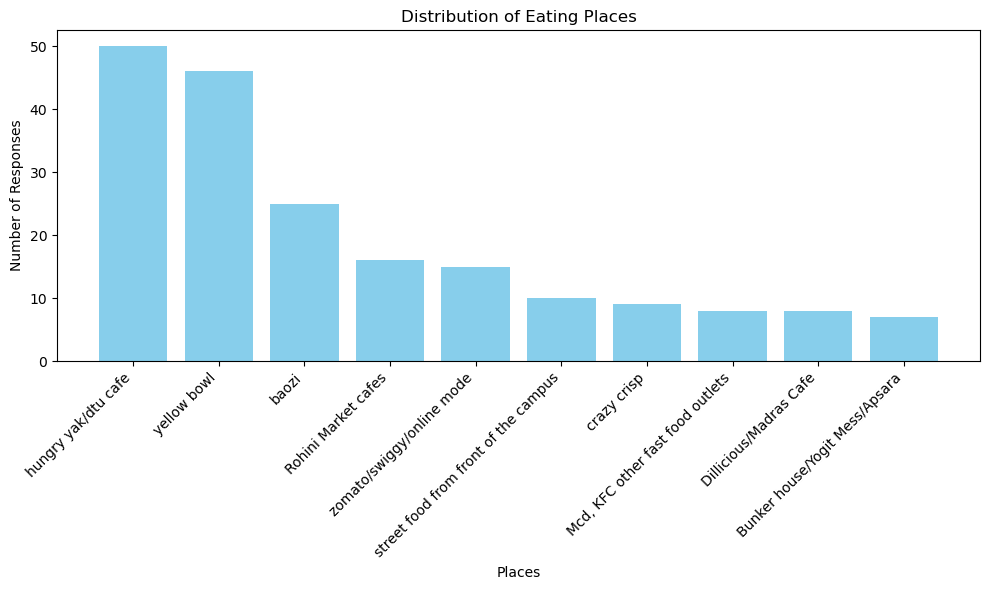

In [21]:
import matplotlib.pyplot as plt

place_counts = resp['places'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(place_counts.index, place_counts.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Eating Places')
plt.xlabel('Places')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.show()

In [22]:
place_counts = resp['places'].value_counts()
print(place_counts)


places
hungry yak/dtu cafe                     50
yellow bowl                             46
baozi                                   25
Rohini Market cafes                     16
zomato/swiggy/online mode               15
street food from front of the campus    10
crazy crisp                              9
Mcd, KFC other fast food outlets         8
Dillicious/Madras Cafe                   8
Bunker house/Yogit Mess/Apsara           7
Name: count, dtype: int64


In [23]:
resp.head()


,id,frequent_meal_type,hunger_level,prefer_drinks,budget,distance,preferred_food_type,places,factors,dietary_restriction
0,ID001,Evening Refreshments,Somewhat hungry,No,80,5,Veg,baozi,Food Quality,No
1,ID002,Dinner,Very hungry,Yes,200,10,Non Veg,crazy crisp,"Price, Distance, Food Quality, Speed of Service",Lactose intolerance
2,ID003,Dinner,Somewhat hungry,No,140,7,Doesn't affect my choice of outlet,zomato/swiggy/online mode,"Food Quality, Variety",No
3,ID004,Evening Refreshments,Very hungry,Yes,200,10,Veg,baozi,Price,Vegetarian food
4,ID005,Dinner,Somewhat hungry,No,100,0,Non Veg,hungry yak/dtu cafe,"Price, Food Quality, Friend's Preference",Nope


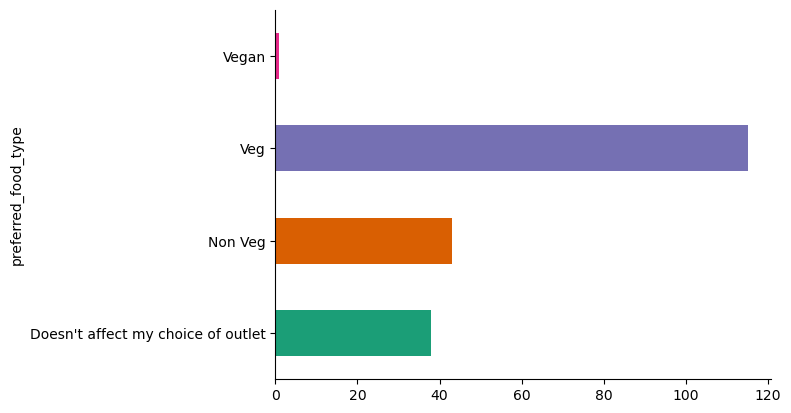

In [24]:
# @title preferred_food_type

from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('preferred_food_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [25]:
resp['preferred_food_type'] = resp['preferred_food_type'].replace('Vegan', 'Veg')

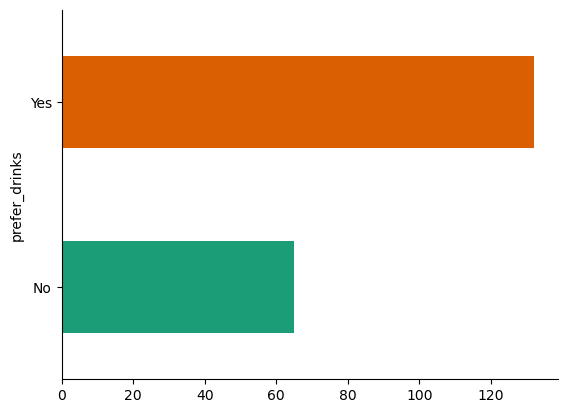

In [26]:
# @title prefer_drinks

from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('prefer_drinks').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

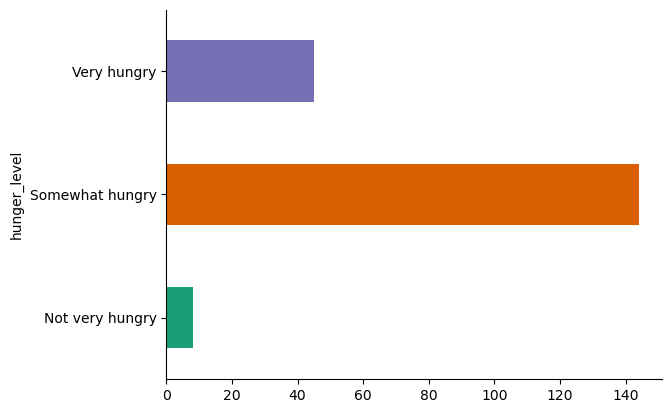

In [27]:
# @title hunger_level

from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('hunger_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
resp['hunger_level'] = resp['hunger_level'].replace('Not very hungry', 'Somewhat hungry')

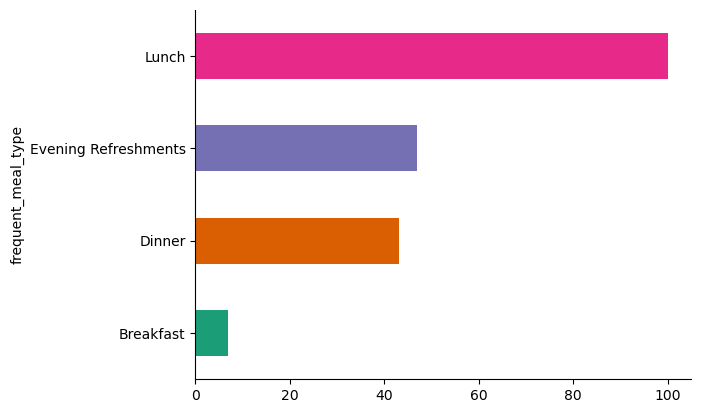

In [29]:
# @title frequent_meal_type

from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('frequent_meal_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

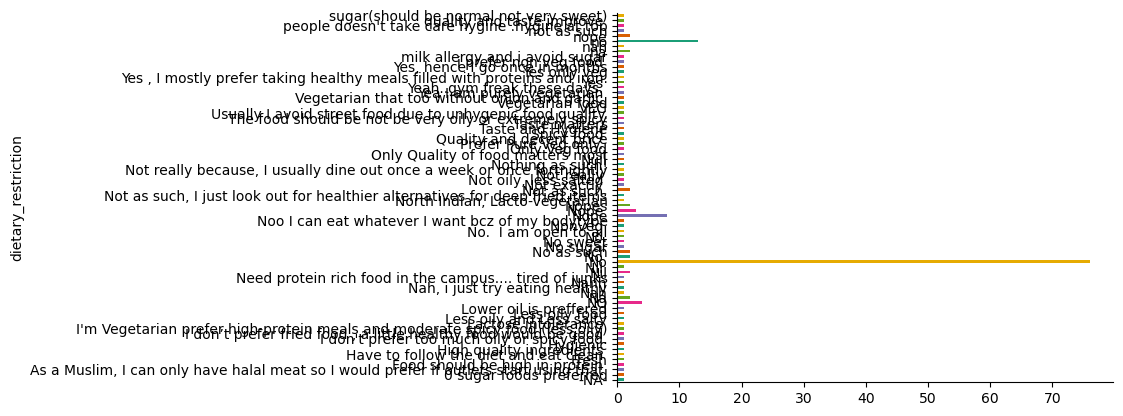

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('dietary_restriction').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

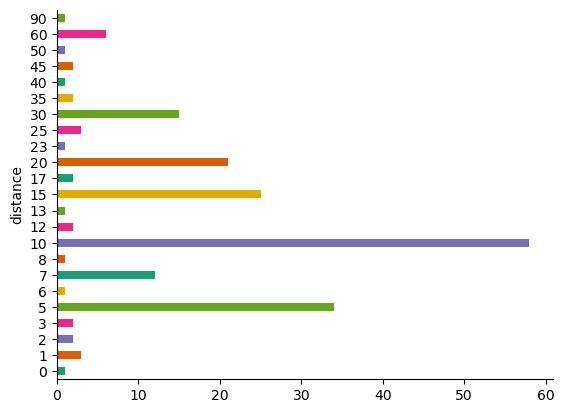

In [31]:
#distance
from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('distance').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [32]:
bins = [0, 5, 10, 15, 20, 25, 30, float('inf')]
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']


resp['travel_time_range'] = pb.cut(resp['distance'], bins=bins, labels=labels, include_lowest=True)

C:\Users\Deepak Singh\AppData\Local\Temp\ipykernel_11376\622173505.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resp.groupby('travel_time_range').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))


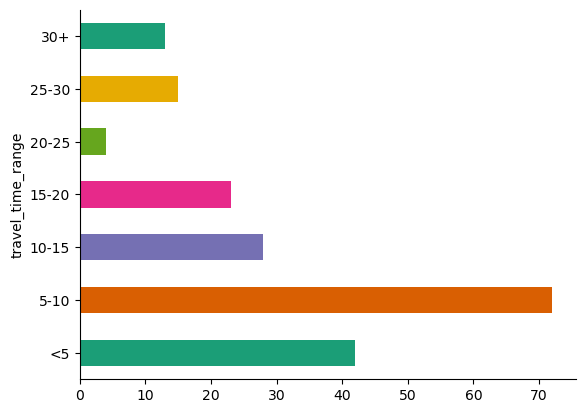

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('travel_time_range').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
bins = [0, 50, 100, 150, 200, 500, 1000, float('inf')]
labels = ['<50', '50-100', '100-150', '150-200', '200-500', '500-1000', '1000+']


resp['budget_range'] = pb.cut(resp['budget'], bins=bins, labels=labels, include_lowest=True)

C:\Users\Deepak Singh\AppData\Local\Temp\ipykernel_11376\237491171.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resp.groupby('budget_range').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))


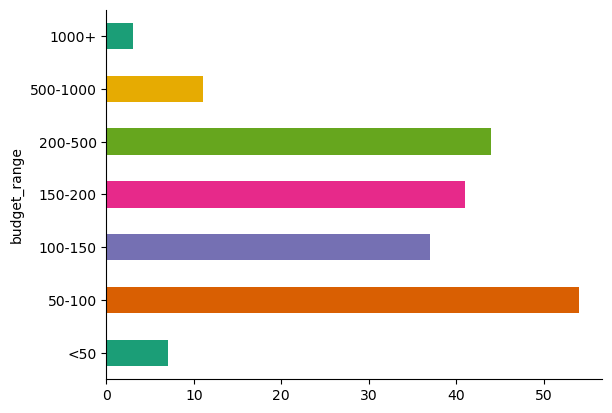

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('budget_range').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:
resp.columns

Index(['id', 'frequent_meal_type', 'hunger_level', 'prefer_drinks', 'budget',
       'distance', 'preferred_food_type', 'places', 'factors',
       'dietary_restriction', 'travel_time_range', 'budget_range'],
      dtype='object')

In [37]:
resp.drop('distance',axis=1,inplace=True)
resp.drop('budget',axis=1,inplace=True)

In [38]:
# resp.to_csv('food_recommendation_data.csv', index=False)
resp.drop('dietary_restriction',axis=1,inplace=True)

In [39]:
(resp.columns.tolist())

['id',
 'frequent_meal_type',
 'hunger_level',
 'prefer_drinks',
 'preferred_food_type',
 'places',
 'factors',
 'travel_time_range',
 'budget_range']

In [40]:
resp

,id,frequent_meal_type,hunger_level,prefer_drinks,preferred_food_type,places,factors,travel_time_range,budget_range
0,ID001,Evening Refreshments,Somewhat hungry,No,Veg,baozi,Food Quality,<5,50-100
1,ID002,Dinner,Very hungry,Yes,Non Veg,crazy crisp,"Price, Distance, Food Quality, Speed of Service",5-10,150-200
2,ID003,Dinner,Somewhat hungry,No,Doesn't affect my choice of outlet,zomato/swiggy/online mode,"Food Quality, Variety",5-10,100-150
3,ID004,Evening Refreshments,Very hungry,Yes,Veg,baozi,Price,5-10,150-200
4,ID005,Dinner,Somewhat hungry,No,Non Veg,hungry yak/dtu cafe,"Price, Food Quality, Friend's Preference",<5,50-100
...,...,...,...,...,...,...,...,...,...
192,ID193,Lunch,Somewhat hungry,Yes,Doesn't affect my choice of outlet,zomato/swiggy/online mode,"Price, Distance, Food Quality, Variety, Friend...",<5,50-100
193,ID194,Lunch,Somewhat hungry,Yes,Veg,baozi,Price,5-10,50-100
194,ID195,Dinner,Somewhat hungry,Yes,Doesn't affect my choice of outlet,yellow bowl,"Price, Food Quality, Ambience, Friend's Prefer...",25-30,500-1000
195,ID196,Evening Refreshments,Very hungry,No,Veg,Bunker house/Yogit Mess/Apsara,"Price, Food Quality, Speed of Service",5-10,50-100


In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
resp['hunger_level_'] = le.fit_transform(resp['hunger_level'])

In [42]:
le = LabelEncoder()
resp['frequent_meal_type_'] = le.fit_transform(resp['frequent_meal_type'])

In [43]:
le = LabelEncoder()
resp['places_'] = le.fit_transform(resp['places'])

In [44]:
le = LabelEncoder()
resp['prefer_drinks_'] = le.fit_transform(resp['prefer_drinks'])

In [45]:
le = LabelEncoder()
resp['prefer_food_type_'] = le.fit_transform(resp['preferred_food_type'])

In [46]:
resp.drop('prefer_drinks',axis=1,inplace=True)

In [47]:
resp.drop('preferred_food_type',axis=1,inplace=True)

In [48]:
#check the mapping
for idx, label in enumerate(le.classes_):
    print(f"{idx}: {label}")

0: Doesn't affect my choice of outlet
1: Non Veg
2: Veg


In [49]:
resp.drop('hunger_level',axis=1,inplace=True)


In [50]:
resp

,id,frequent_meal_type,places,factors,travel_time_range,budget_range,hunger_level_,frequent_meal_type_,places_,prefer_drinks_,prefer_food_type_
0,ID001,Evening Refreshments,baozi,Food Quality,<5,50-100,0,2,4,0,2
1,ID002,Dinner,crazy crisp,"Price, Distance, Food Quality, Speed of Service",5-10,150-200,1,1,5,1,1
2,ID003,Dinner,zomato/swiggy/online mode,"Food Quality, Variety",5-10,100-150,0,1,9,0,0
3,ID004,Evening Refreshments,baozi,Price,5-10,150-200,1,2,4,1,2
4,ID005,Dinner,hungry yak/dtu cafe,"Price, Food Quality, Friend's Preference",<5,50-100,0,1,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
192,ID193,Lunch,zomato/swiggy/online mode,"Price, Distance, Food Quality, Variety, Friend...",<5,50-100,0,3,9,1,0
193,ID194,Lunch,baozi,Price,5-10,50-100,0,3,4,1,2
194,ID195,Dinner,yellow bowl,"Price, Food Quality, Ambience, Friend's Prefer...",25-30,500-1000,0,1,8,1,0
195,ID196,Evening Refreshments,Bunker house/Yogit Mess/Apsara,"Price, Food Quality, Speed of Service",5-10,50-100,1,2,0,0,2


In [51]:
resp.drop('frequent_meal_type',axis=1,inplace=True)
resp.drop('places',axis=1,inplace=True)
resp.drop('factors',axis=1,inplace=True)

In [52]:
resp.columns

Index(['id', 'travel_time_range', 'budget_range', 'hunger_level_',
       'frequent_meal_type_', 'places_', 'prefer_drinks_',
       'prefer_food_type_'],
      dtype='object')

In [53]:
resp

,id,travel_time_range,budget_range,hunger_level_,frequent_meal_type_,places_,prefer_drinks_,prefer_food_type_
0,ID001,<5,50-100,0,2,4,0,2
1,ID002,5-10,150-200,1,1,5,1,1
2,ID003,5-10,100-150,0,1,9,0,0
3,ID004,5-10,150-200,1,2,4,1,2
4,ID005,<5,50-100,0,1,6,0,1
...,...,...,...,...,...,...,...,...
192,ID193,<5,50-100,0,3,9,1,0
193,ID194,5-10,50-100,0,3,4,1,2
194,ID195,25-30,500-1000,0,1,8,1,0
195,ID196,5-10,50-100,1,2,0,0,2


In [54]:
resp

,id,travel_time_range,budget_range,hunger_level_,frequent_meal_type_,places_,prefer_drinks_,prefer_food_type_
0,ID001,<5,50-100,0,2,4,0,2
1,ID002,5-10,150-200,1,1,5,1,1
2,ID003,5-10,100-150,0,1,9,0,0
3,ID004,5-10,150-200,1,2,4,1,2
4,ID005,<5,50-100,0,1,6,0,1
...,...,...,...,...,...,...,...,...
192,ID193,<5,50-100,0,3,9,1,0
193,ID194,5-10,50-100,0,3,4,1,2
194,ID195,25-30,500-1000,0,1,8,1,0
195,ID196,5-10,50-100,1,2,0,0,2


# Logistic Regression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = resp[['hunger_level_', 'frequent_meal_type_', 'budget_range', 'prefer_drinks_', 'prefer_food_type_','travel_time_range']]
y = resp['places_']

# One-hot encode budget range if needed
X = pb.get_dummies(X, columns=['budget_range'])
X = pb.get_dummies(X, columns=['travel_time_range'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         6
           4       0.20      0.33      0.25         3
           6       0.27      0.60      0.38        10
           7       0.00      0.00      0.00         1
           8       0.38      0.45      0.42        11
           9       0.00      0.00      0.00         4

    accuracy                           0.30        40
   macro avg       0.10      0.15      0.12        40
weighted avg       0.19      0.30      0.23        40



C:\Users\Deepak Singh\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Deepak Singh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Deepak Singh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

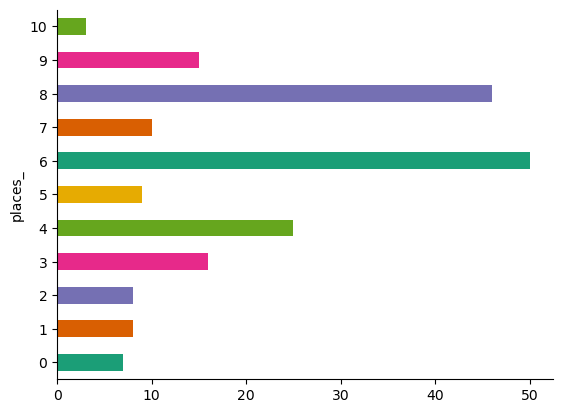

In [56]:
from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('places_').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [57]:
resp['places_'] = resp['places_'].replace(0, 1)

# Random Forest

In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Check the number of available samples
n_samples = X_train.shape[0]

# Set neighbors <= n_samples
n_neighbors = min(5, n_samples)  # or any value <= n_samples

model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)


KNeighborsClassifier()

In [59]:

if len(X_train) >= 2:
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    knn.predict(X_test)
else:
    print("Not enough samples to run KNN with n_neighbors=2")


In [60]:
print(f"Samples available: {len(X_train)}")


Samples available: 157


In [61]:
print("Raw y class counts:")
print(y.value_counts())
print("All unique classes:", y.unique())


Raw y class counts:
places_
6     50
8     46
4     25
3     16
9     15
7     10
5      9
2      8
1      8
0      7
10     3
Name: count, dtype: int64
All unique classes: [ 4  5  9  6  2  8  3  1  7  0 10]


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Step 1: Make sure 'budget_range' exists
assert 'budget_range' in resp.columns

# Step 2: Clean target labels


# Step 3: Feature and label selection
X = resp[['hunger_level_', 'frequent_meal_type_', 'budget_range', 'prefer_drinks_', 'prefer_food_type_', 'travel_time_range']]
y = resp['places_']
print(y.value_counts())

places_
6     50
8     46
4     25
3     16
9     15
1     15
7     10
5      9
2      8
10     3
Name: count, dtype: int64


In [63]:


# Step 4: Filter out rare classes
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= 2].index
mask = y.isin(valid_classes)
X = X[mask]
y = y[mask]


# Step 5: Define categorical and numeric columns
categorical_cols = ['budget_range', 'travel_time_range']
numeric_cols = ['hunger_level_', 'frequent_meal_type_', 'prefer_drinks_', 'prefer_food_type_']

# Step 6: One-hot encode categorical features
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numeric features as-is
)

X_encoded = encoder.fit_transform(X)

# Step 7: Apply SMOTE
sm = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = sm.fit_resample(X_encoded, y)

# Step 8: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# Step 9: Train Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# Step 10: Evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.67      0.80      0.73        10
           2       1.00      0.80      0.89        10
           3       1.00      0.90      0.95        10
           4       0.60      0.30      0.40        10
           5       0.90      0.90      0.90        10
           6       0.21      0.30      0.25        10
           7       0.62      0.80      0.70        10
           8       0.38      0.30      0.33        10
           9       0.67      0.80      0.73        10
          10       1.00      0.90      0.95        10

    accuracy                           0.68       100
   macro avg       0.70      0.68      0.68       100
weighted avg       0.70      0.68      0.68       100



In [64]:
print(X.columns)


Index(['hunger_level_', 'frequent_meal_type_', 'budget_range',
       'prefer_drinks_', 'prefer_food_type_', 'travel_time_range'],
      dtype='object')


In [65]:
print("Raw y class counts:")
print(y.value_counts())
print("All unique classes:", y.unique())

Raw y class counts:
places_
6     50
8     46
4     25
3     16
9     15
1     15
7     10
5      9
2      8
10     3
Name: count, dtype: int64
All unique classes: [ 4  5  9  6  2  8  3  1  7 10]


In [66]:
import sklearn
print(sklearn.__version__)


1.6.1


In [67]:
import cloudpickle

with open("encoder.pkl", "wb") as f:
    cloudpickle.dump(encoder, f)
    


In [68]:
with open("model.pkl", "wb") as f:
    cloudpickle.dump(rf, f)


In [69]:
print(type(encoder))  # Should say something like sklearn.compose._column_transformer.ColumnTransformer


<class 'sklearn.compose._column_transformer.ColumnTransformer'>


In [70]:
print("Input columns:", X.columns)
print("Expected by encoder:", encoder.get_feature_names_out())  # if applicable


Input columns: Index(['hunger_level_', 'frequent_meal_type_', 'budget_range',
       'prefer_drinks_', 'prefer_food_type_', 'travel_time_range'],
      dtype='object')
Expected by encoder: ['cat__budget_range_100-150' 'cat__budget_range_1000+'
 'cat__budget_range_150-200' 'cat__budget_range_200-500'
 'cat__budget_range_50-100' 'cat__budget_range_500-1000'
 'cat__budget_range_<50' 'cat__travel_time_range_10-15'
 'cat__travel_time_range_15-20' 'cat__travel_time_range_20-25'
 'cat__travel_time_range_25-30' 'cat__travel_time_range_30+'
 'cat__travel_time_range_5-10' 'cat__travel_time_range_<5'
 'remainder__hunger_level_' 'remainder__frequent_meal_type_'
 'remainder__prefer_drinks_' 'remainder__prefer_food_type_']
